In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
import pandas
from sklearn import preprocessing

labelEncoder = preprocessing.LabelEncoder()

tennisData = pandas.read_csv("play_tennis.csv")
tennisData = tennisData[['outlook', 'temp', 'humidity', 'wind', 'play']]

In [3]:
tennisData

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
tennisData['outlook'] = labelEncoder.fit_transform(tennisData['outlook'])
tennisData['temp'] = labelEncoder.fit_transform(tennisData['temp'])
tennisData['humidity'] = labelEncoder.fit_transform(tennisData['humidity'])
tennisData['wind'] = labelEncoder.fit_transform(tennisData['wind'])
tennisData['play'] = labelEncoder.fit_transform(tennisData['play'])

In [5]:
tennisData

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

tennisAttr = []
tennisTarget = tennisData['play'].values

tennisOutlook = tennisData['outlook'].values
tennisTemp = tennisData['temp'].values
tennisHumidity = tennisData['humidity'].values 
tennisWind = tennisData['wind'].values

for i in range(len(tennisData)):
    tennisAttr.append([tennisOutlook[i], tennisTemp[i], tennisHumidity[i], tennisWind[i]])
    
tennisTrain, tennisTest, targetTrain, targetTest = train_test_split(tennisAttr, tennisTarget, test_size=0.1, random_state=42)

In [7]:
from sklearn import tree

dtlTennis = tree.DecisionTreeClassifier()
dtlTennis = dtlTennis.fit(tennisTrain, targetTrain)
print(tennisTrain)
print(targetTrain)

[[2, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 0], [2, 0, 1, 1], [0, 1, 0, 1], [2, 1, 0, 0], [1, 2, 0, 0], [1, 0, 1, 1], [2, 2, 0, 1], [2, 2, 1, 0], [1, 2, 0, 1], [0, 0, 1, 0]]
[0 1 0 1 1 0 0 1 0 1 1 1]


In [8]:
tree.plot_tree(dtlTennis)

[Text(275.55555555555554, 332.64, 'X[2] <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(165.33333333333334, 258.71999999999997, 'X[0] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(110.22222222222223, 184.8, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(55.111111111111114, 110.88, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(165.33333333333334, 110.88, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(220.44444444444446, 184.8, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(385.7777777777778, 258.71999999999997, 'X[3] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(330.6666666666667, 184.8, 'X[1] <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(275.55555555555554, 110.88, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(220.44444444444446, 36.960000000000036, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(330.6666666666667, 36.960000000000036, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(385.7

In [9]:
print(dtlTennis.predict(tennisTest))
print(targetTest)

[1 0]
[1 1]


In [10]:
dtlIris = tree.DecisionTreeClassifier()
dtlIris = dtlIris.fit(iris.data, iris.target)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

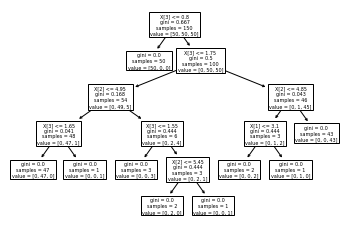

In [11]:
tree.plot_tree(dtlIris)

In [12]:
from id3 import Id3Estimator
from id3 import export_graphviz

##Buka file .dot dengan command 'dot -Tpdf IrisID3Tree.dot -o IrisID3Tree.pdf'

id3Tennis = Id3Estimator()
id3Tennis = id3Tennis.fit(tennisTrain, targetTrain)
tree = export_graphviz(id3Tennis.tree_, 'TennisID3Tree.dot', ['outlook', 'temp', 'humidity', 'wind'])

/home/khairulmakirin/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [13]:
id3Iris = Id3Estimator()
id3Iris = id3Iris.fit(iris.data, iris.target)
tree = export_graphviz(id3Tennis.tree_, 'IrisID3Tree.dot', iris.feature_names)